In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv', encoding="utf-8")

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
df.columns = df.columns.str.replace(' ', '').str.replace('Unnamed:0','Unnamed')

df.head()

,Unnamed,ClothingID,Age,Title,ReviewText,Rating,RecommendedIND,PositiveFeedbackCount,DivisionName,DepartmentName,ClassName
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df2 = df.copy()

In [7]:
df2

,Unnamed,ClothingID,Age,Title,ReviewText,Rating,RecommendedIND,PositiveFeedbackCount,DivisionName,DepartmentName,ClassName
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [8]:
df2.isnull().sum()

Unnamed                     0
ClothingID                  0
Age                         0
Title                    3810
ReviewText                845
Rating                      0
RecommendedIND              0
PositiveFeedbackCount       0
DivisionName               14
DepartmentName             14
ClassName                  14
dtype: int64

## Feature Selection and Data Cleaning

In [9]:
df2['Review'] = df2['Title'].map(str)+' '+ df2['ReviewText'].astype(str)

In [10]:
df2['Review']  # .reset_index(drop=True)

0        nan Absolutely wonderful - silky and sexy and ...
1        nan Love this dress!  it's sooo pretty.  i hap...
2        Some major design flaws I had such high hopes ...
3        My favorite buy! I love, love, love this jumps...
4        Flattering shirt This shirt is very flattering...
                               ...                        
23481    Great dress for many occasions I was very happ...
23482    Wish it was made of cotton It reminds me of ma...
23483    Cute, but see through This fit well, but the t...
23484    Very cute dress, perfect for summer parties an...
23485    Please make more like this one! This dress in ...
Name: Review, Length: 23486, dtype: object

In [11]:
## df2['Review'] = df2['Title'].astype(str)+' '+ df2['ReviewText'].astype(str)

In [12]:
df2['Review'].shape[0]

23486

In [13]:
df2['Review'] = df2['Review'].dropna()

In [14]:
df2['Review'].isnull().sum()

0

In [15]:
df2['Review'].shape[0]

23486

In [16]:
nltk.download('punkt')      
nltk.download('stopwords')   
nltk.download('wordnet')     
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
df2['Review']

0        nan Absolutely wonderful - silky and sexy and ...
1        nan Love this dress!  it's sooo pretty.  i hap...
2        Some major design flaws I had such high hopes ...
3        My favorite buy! I love, love, love this jumps...
4        Flattering shirt This shirt is very flattering...
                               ...                        
23481    Great dress for many occasions I was very happ...
23482    Wish it was made of cotton It reminds me of ma...
23483    Cute, but see through This fit well, but the t...
23484    Very cute dress, perfect for summer parties an...
23485    Please make more like this one! This dress in ...
Name: Review, Length: 23486, dtype: object

In [18]:
df2['Review'][15135]

"Perfect fall cape.....easy to wear! Love this medium weight wool cape. it is so much prettier in person. the photos look a bit boring but this cape is very versatile and simple to wear. some capes hang oddly on me but this one was flattering without the bulk. not itchy either. the photos don't really show the sleeves clearly but there is a sleeve built into the cape. the taupe color is a rich neutral that can be paired with thin or thicker turtlenecks or shirts. the sleeves are bracelet length so full length sweaters will show und"

## text preprocessing

In [19]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [20]:
def cleaning_fsa(data):
    
    #1. removing upper brackets to keep negative auxiliary verbs in text
    text = data.replace("'",'')
         
    #2. Tokenize and lower
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove punkt and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords     
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
   
    #6. joining
    return " ".join(text_cleaned)

In [21]:
np.array(pd.Series(df2['Review']).apply(cleaning_fsa))

array(['nan absolutely wonderful silky sexy comfortable',
       'nan love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
       'major design flaw high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
       ...,
       'cute see fit well top see never would worked im glad able try store didnt order online different fabric would great',
       'cute dress perfect summer party bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might not worth side note dress delivered nordstrom tag found much cheap

In [22]:
nan = ['nan']

for char in nan:
    df2['Review'] = df2['Review'].str.replace('nan', '')

In [23]:
np.array(pd.Series(df2['Review']).apply(cleaning_fsa))

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
       'major design flaw high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
       ...,
       'cute see fit well top see never would worked im glad able try store didnt order online different fabric would great',
       'cute dress perfect summer party bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might not worth side note dress delivered nordstrom tag found much cheaper looki

## word cloud

In [24]:
from wordcloud import WordCloud

In [25]:
df = df2.filter(['Review', 'RecommendedIND'], axis = 1)

df

,Review,RecommendedIND
0,Absolutely wonderful - silky and sexy and com...,1
1,Love this dress! it's sooo pretty. i happen...,1
2,Some major design flaws I had such high hopes ...,0
3,"My favorite buy! I love, love, love this jumps...",1
4,Flattering shirt This shirt is very flattering...,1
...,...,...
23481,Great dress for many occasions I was very happ...,1
23482,Wish it was made of cotton It reminds me of ma...,1
23483,"Cute, but see through This fit well, but the t...",0
23484,"Very cute dress, perfect for summer parties an...",1


In [26]:
worldcloud_negative = WordCloud(background_color="white", max_words =250)

In [27]:
words_negative = ' '.join([Review for Review in df[df['RecommendedIND']==0]['Review']])

In [28]:
worldcloud_negative.generate(words_negative)

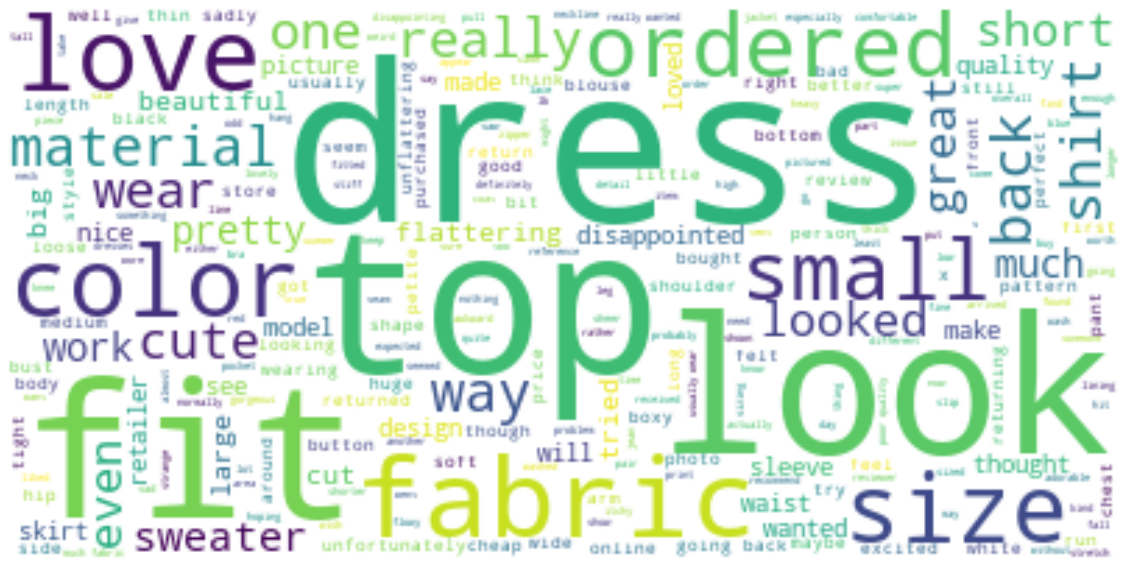

In [29]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (20,20))
plt.imshow(worldcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show();

In [30]:
worldcloud_positive = WordCloud(background_color="white", max_words =250)

In [31]:
words_positive = ' '.join([Review for Review in df[df['RecommendedIND']==1]['Review']])

In [32]:
worldcloud_positive.generate(words_positive)

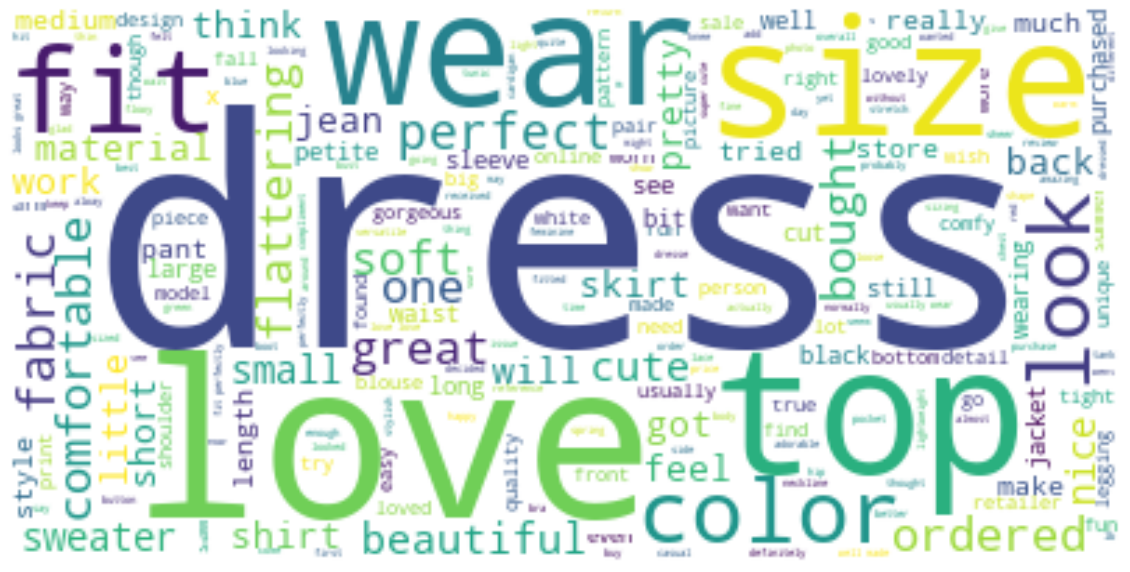

In [33]:
plt.figure(figsize = (20,20))
plt.imshow(worldcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show();

## Sentiment Classification with Machine Learning, Deep Learning and BERT Model

In [34]:
df['RecommendedIND'] = df['RecommendedIND'].map({1:0, 0:1})

In [35]:
df['RecommendedIND'].value_counts(normalize=True)

0    0.822362
1    0.177638
Name: RecommendedIND, dtype: float64

In [36]:
X = df["Review"]
y = df['RecommendedIND']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

## Vectorization

In [38]:
vectorizer = CountVectorizer(preprocessor=cleaning_fsa, min_df=3) 
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [39]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,...,yo,yoga,yogi,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yummy,zag,zero,zig,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression

In [43]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced') 
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [44]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1703  229]
 [  59  358]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1932
           1       0.61      0.86      0.71       417

    accuracy                           0.88      2349
   macro avg       0.79      0.87      0.82      2349
weighted avg       0.90      0.88      0.88      2349

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     17382
           1       0.64      0.90      0.75      3755

    accuracy                           0.89     21137
   macro avg       0.81      0.89      0.84     21137
weighted avg       0.92      0.89      0.90     21137



In [45]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall-neg': make_scorer(recall_score, average=None, labels = [1]),
            'f1-neg': make_scorer(f1_score, average=None, labels = [1])}

model = LogisticRegression(C = 0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.888488
train_accuracy         0.900285
test_precision-neg     0.788412
train_precision-neg    0.830100
test_recall-neg        0.508916
train_recall-neg       0.551590
test_f1-neg            0.617996
train_f1-neg           0.662768
dtype: float64

In [46]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from scikitplot.metrics import plot_roc, plot_precision_recall

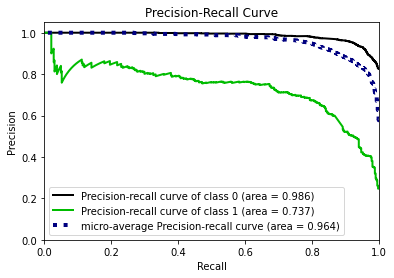

In [48]:
model = LogisticRegression(C = 0.02, max_iter=1000)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [49]:
y_test_dummies = pd.get_dummies(y_test)

In [50]:
y_pred_proba

array([[0.95089141, 0.04910859],
       [0.98612644, 0.01387356],
       [0.1877501 , 0.8122499 ],
       ...,
       [0.73608711, 0.26391289],
       [0.96167867, 0.03832133],
       [0.72785112, 0.27214888]])

In [51]:
from sklearn.metrics import average_precision_score

In [52]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
log_AP_neg = average_precision_score(y_test_dummies[1], y_pred_proba[:, 0])

## TF IDF

In [53]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning_fsa, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [54]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,...,yo,yoga,yogi,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yummy,zag,zero,zig,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
log = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [57]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1672  260]
 [  56  361]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1932
           1       0.58      0.87      0.70       417

    accuracy                           0.87      2349
   macro avg       0.77      0.87      0.80      2349
weighted avg       0.90      0.87      0.87      2349

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.92     17382
           1       0.59      0.89      0.71      3755

    accuracy                           0.87     21137
   macro avg       0.78      0.88      0.81     21137
weighted avg       0.90      0.87      0.88     21137



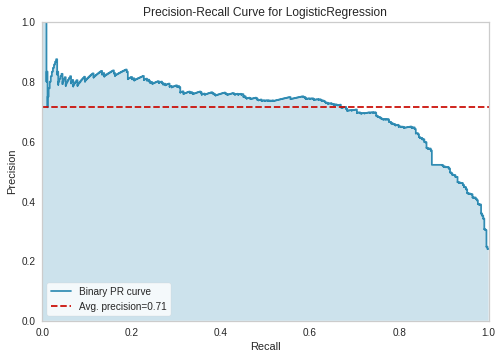

In [58]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
    )
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

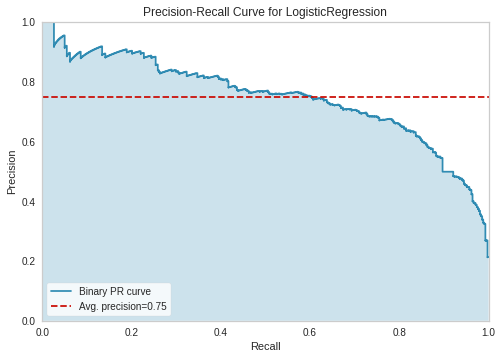

In [59]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
    )
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [60]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [62]:
nb = MultinomialNB(alpha=10)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=10)

In [63]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1884   48]
 [ 216  201]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      1932
           1       0.81      0.48      0.60       417

    accuracy                           0.89      2349
   macro avg       0.85      0.73      0.77      2349
weighted avg       0.88      0.89      0.88      2349

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     17382
           1       0.85      0.51      0.64      3755

    accuracy                           0.90     21137
   macro avg       0.88      0.75      0.79     21137
weighted avg       0.89      0.90      0.89     21137



In [64]:
model = MultinomialNB(alpha=10)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.883190
train_accuracy         0.891985
test_precision-neg     0.830728
train_precision-neg    0.859122
test_recall-neg        0.430084
train_recall-neg       0.468856
test_f1-neg            0.566515
train_f1-neg           0.606628
dtype: float64

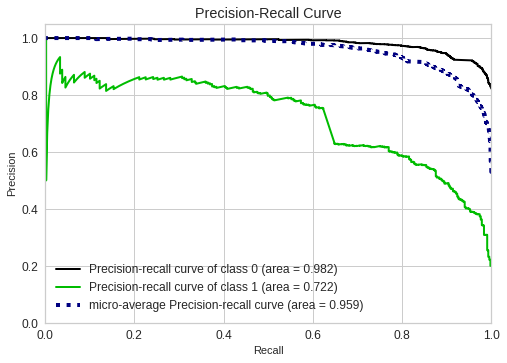

In [65]:
model = MultinomialNB(alpha=10)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [66]:
y_pred_proba

array([[9.99966196e-01, 3.38044630e-05],
       [9.99999677e-01, 3.23012002e-07],
       [3.06875420e-01, 6.93124580e-01],
       ...,
       [9.99999976e-01, 2.38975339e-08],
       [9.99739565e-01, 2.60435374e-04],
       [9.84188620e-01, 1.58113803e-02]])

In [67]:
y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
nb_AP_neg = average_precision_score(y_test_dummies[1], y_pred_proba[:, 0])

## TF IDF

In [68]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [69]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1763  169]
 [  87  330]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1932
           1       0.66      0.79      0.72       417

    accuracy                           0.89      2349
   macro avg       0.81      0.85      0.83      2349
weighted avg       0.90      0.89      0.89      2349

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     17382
           1       0.69      0.82      0.75      3755

    accuracy                           0.90     21137
   macro avg       0.82      0.87      0.84     21137
weighted avg       0.91      0.90      0.90     21137



In [70]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.884845
train_accuracy         0.902882
test_precision-neg     0.648602
train_precision-neg    0.690874
test_recall-neg        0.769109
train_recall-neg       0.820417
test_f1-neg            0.703661
train_f1-neg           0.750092
dtype: float64

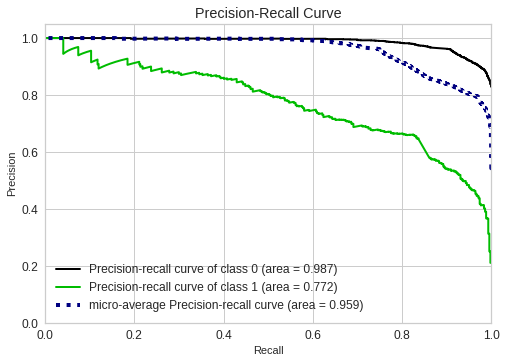

In [71]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = MultinomialNB()

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [72]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## SVM

In [73]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [74]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1855   77]
 [ 153  264]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1932
           1       0.77      0.63      0.70       417

    accuracy                           0.90      2349
   macro avg       0.85      0.80      0.82      2349
weighted avg       0.90      0.90      0.90      2349

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     17382
           1       0.85      0.68      0.76      3755

    accuracy                           0.92     21137
   macro avg       0.89      0.83      0.86     21137
weighted avg       0.92      0.92      0.92     21137



In [75]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.897950
train_accuracy         0.923504
test_precision-neg     0.779768
train_precision-neg    0.858147
test_recall-neg        0.593611
train_recall-neg       0.682172
test_f1-neg            0.673778
train_f1-neg           0.760103
dtype: float64

In [76]:
svc = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [77]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1701  231]
 [  49  368]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1932
           1       0.61      0.88      0.72       417

    accuracy                           0.88      2349
   macro avg       0.79      0.88      0.82      2349
weighted avg       0.91      0.88      0.89      2349

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     17382
           1       0.63      0.91      0.75      3755

    accuracy                           0.89     21137
   macro avg       0.81      0.90      0.84     21137
weighted avg       0.92      0.89      0.90     21137



In [78]:
model = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.876046
train_accuracy         0.890350
test_precision-neg     0.604516
train_precision-neg    0.632451
test_recall-neg        0.874285
train_recall-neg       0.913922
test_f1-neg            0.714774
train_f1-neg           0.747568
dtype: float64

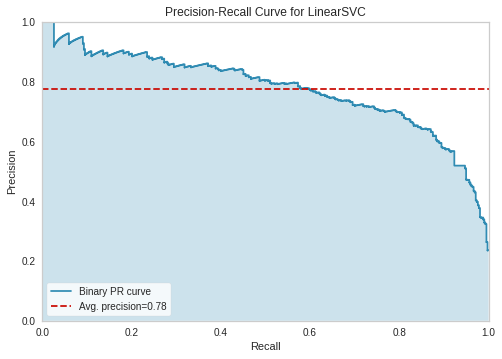

In [79]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.03, class_weight="balanced", random_state=101),

)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

# when i applied the ROC graph as i applied above i got error

In [80]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1,class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [82]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1849   83]
 [ 165  252]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1932
           1       0.75      0.60      0.67       417

    accuracy                           0.89      2349
   macro avg       0.84      0.78      0.80      2349
weighted avg       0.89      0.89      0.89      2349

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17382
           1       0.96      0.96      0.96      3755

    accuracy                           0.99     21137
   macro avg       0.98      0.97      0.98     21137
weighted avg       0.99      0.99      0.99     21137



In [83]:
model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.850120
train_accuracy         0.940252
test_precision-neg     0.919848
train_precision-neg    1.000000
test_recall-neg        0.171236
train_recall-neg       0.663678
test_f1-neg            0.288501
train_f1-neg           0.797818
dtype: float64

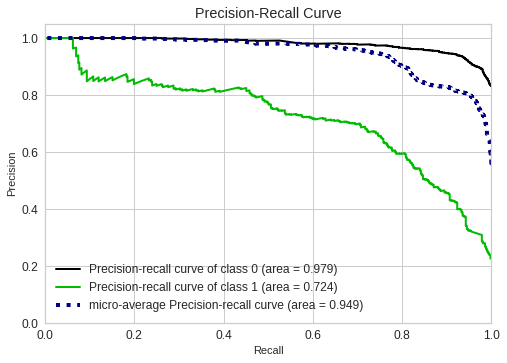

In [84]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [85]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
rf_AP_neg = average_precision_score(y_test, y_pred_proba[:, 0])

In [86]:
rf = RandomForestClassifier(100, max_depth = 7, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [87]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1653  279]
 [  81  336]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1932
           1       0.55      0.81      0.65       417

    accuracy                           0.85      2349
   macro avg       0.75      0.83      0.78      2349
weighted avg       0.88      0.85      0.86      2349

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     17382
           1       0.58      0.87      0.70      3755

    accuracy                           0.86     21137
   macro avg       0.77      0.87      0.80     21137
weighted avg       0.90      0.86      0.87     21137



In [88]:
model = RandomForestClassifier(100, max_depth = 7, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.836920
train_accuracy         0.860035
test_precision-neg     0.526737
train_precision-neg    0.570096
test_recall-neg        0.809839
train_recall-neg       0.863648
test_f1-neg            0.638171
train_f1-neg           0.686787
dtype: float64

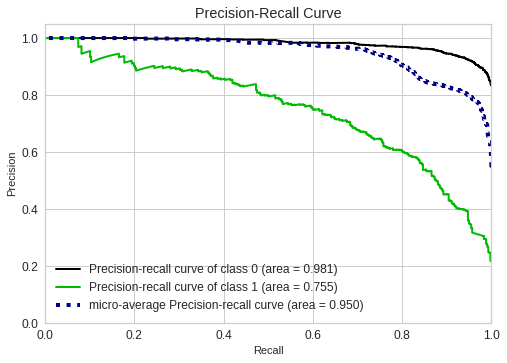

In [89]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [90]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
rf_tfidf_AP_neg = average_precision_score(y_test_dummies[1], y_pred_proba[:, 0])

## Ada Boost

In [91]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [92]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1834   98]
 [ 151  266]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1932
           1       0.73      0.64      0.68       417

    accuracy                           0.89      2349
   macro avg       0.83      0.79      0.81      2349
weighted avg       0.89      0.89      0.89      2349

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     17382
           1       0.82      0.68      0.75      3755

    accuracy                           0.92     21137
   macro avg       0.88      0.83      0.85     21137
weighted avg       0.91      0.92      0.91     21137



In [93]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.892699
train_accuracy         0.919257
test_precision-neg     0.738078
train_precision-neg    0.824773
test_recall-neg        0.614372
train_recall-neg       0.692676
test_f1-neg            0.670317
train_f1-neg           0.752962
dtype: float64

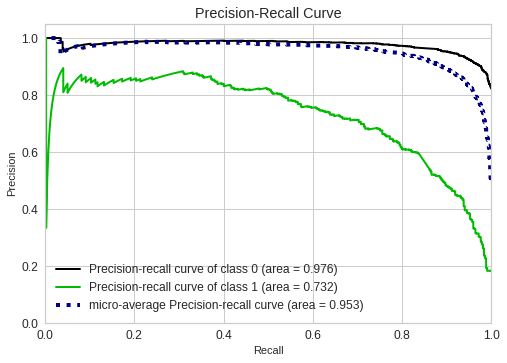

In [94]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [95]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
ada_AP_neg = average_precision_score(y_test, y_pred_proba[:, 0])

In [96]:
ada = AdaBoostClassifier(n_estimators= 100, random_state = 42, learning_rate=0.7)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42)

In [97]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1862   70]
 [ 194  223]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1932
           1       0.76      0.53      0.63       417

    accuracy                           0.89      2349
   macro avg       0.83      0.75      0.78      2349
weighted avg       0.88      0.89      0.88      2349

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     17382
           1       0.79      0.51      0.62      3755

    accuracy                           0.89     21137
   macro avg       0.85      0.74      0.78     21137
weighted avg       0.88      0.89      0.88     21137



In [98]:
model = AdaBoostClassifier(n_estimators= 100, random_state = 42, learning_rate=0.7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.880588
train_accuracy         0.888994
test_precision-neg     0.758022
train_precision-neg    0.788425
test_recall-neg        0.481489
train_recall-neg       0.512768
test_f1-neg            0.588679
train_f1-neg           0.621376
dtype: float64

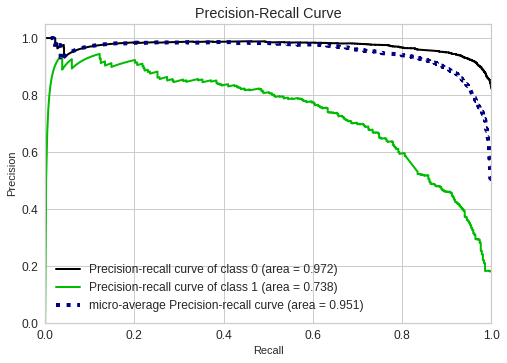

In [99]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [100]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
ada_tfidf_AP_neg = average_precision_score(y_test_dummies[1], y_pred_proba[:, 0])

## DL

In [101]:
num_words = 15001

tokenizer = Tokenizer(num_words=num_words)

In [102]:
tokenizer.fit_on_texts(X)

In [103]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'dress': 17,
 'my': 18,
 'love': 19,
 'not': 20,
 'that': 21,
 'size': 22,
 'very': 23,
 'top': 24,
 'have': 25,
 'fit': 26,
 'great': 27,
 'like': 28,
 'are': 29,
 'be': 30,
 'me': 31,
 'as': 32,
 'wear': 33,
 'too': 34,
 "it's": 35,
 'or': 36,
 "i'm": 37,
 'just': 38,
 'am': 39,
 'you': 40,
 'fabric': 41,
 'small': 42,
 'would': 43,
 'they': 44,
 'up': 45,
 'color': 46,
 'at': 47,
 'cute': 48,
 'perfect': 49,
 'beautiful': 50,
 'look': 51,
 'if': 52,
 'really': 53,
 'more': 54,
 'flattering': 55,
 'little': 56,
 'ordered': 57,
 'these': 58,
 'soft': 59,
 'one': 60,
 'will': 61,
 'nice': 62,
 'comfortable': 63,
 'well': 64,
 'an': 65,
 'out': 66,
 'back': 67,
 'had': 68,
 'can': 69,
 'because': 70,
 'shirt': 71,
 'than': 72,
 'large': 73,
 '\r': 74,
 'bought': 75,
 'all': 76,
 'looks': 77,
 'sweater': 78,
 'down'

In [104]:
len(tokenizer.word_index)

15392

In [105]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [106]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)
num_tokens

array([  7,  62, 101, ...,  46,  94,  24])

In [107]:
num_tokens.mean()

61.21250958017542

In [108]:
num_tokens.max()

119

In [109]:
X_pad = pad_sequences(X_num_tokens, maxlen=num_tokens.max())

In [110]:
X_pad.shape

(23486, 119)

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

## Modeling

In [112]:
model = Sequential()

In [113]:
embedding_size = 50

In [114]:
max_tokens = num_tokens.max()

In [115]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [116]:
optimizer = Adam(learning_rate=0.001)

In [117]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [118]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 119, 50)           750050    
                                                                 
 dropout (Dropout)           (None, 119, 50)           0         
                                                                 
 gru (GRU)                   (None, 119, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 119, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 119, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 119, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [119]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.60801404, 2.81451398])

In [120]:
model.fit(X_train, y_train, epochs=1, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test)) # callbacks=[early_stop]

166/166 [==============================] - 31s 137ms/step - loss: 0.4724 - recall: 0.7917 - val_loss: 0.3484 - val_recall: 0.9161


In [121]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.472378,0.791744,0.348376,0.916067


In [122]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

74/74 [==============================] - 1s 7ms/step
[[1634  298]
 [  35  382]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1932
           1       0.56      0.92      0.70       417

    accuracy                           0.86      2349
   macro avg       0.77      0.88      0.80      2349
weighted avg       0.90      0.86      0.87      2349



In [123]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

661/661 [==============================] - 4s 6ms/step
[[14959  2423]
 [  229  3526]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     17382
           1       0.59      0.94      0.73      3755

    accuracy                           0.87     21137
   macro avg       0.79      0.90      0.82     21137
weighted avg       0.92      0.87      0.88     21137



74/74 [==============================] - 1s 9ms/step


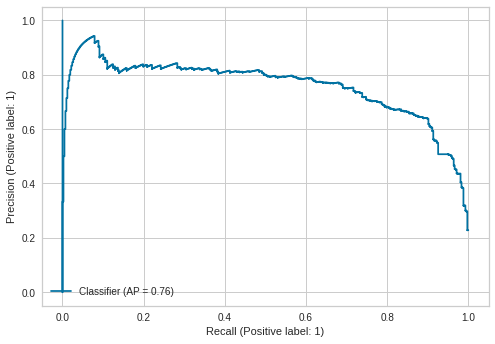

In [124]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [125]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7567769211060504

In [126]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [127]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
import numpy as np
import pandas as pd

In [129]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  168


In [130]:
np.array(num_of_sent_tokens).mean()

77.67699906327174

In [131]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

0.9998722643276846

In [132]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

In [133]:
all_sentence_tokens = tokenizer(list(X), max_length=162, truncation=True,
                                      padding='max_length', add_special_tokens=True)

In [134]:
np.array(all_sentence_tokens['input_ids'])

array([[  101,  7078,  6919, ...,     0,     0,     0],
       [  101,  2293,  2023, ...,     0,     0,     0],
       [  101,  2070,  2350, ...,     0,     0,     0],
       ...,
       [  101, 10140,  1010, ...,     0,     0,     0],
       [  101,  2200, 10140, ...,     0,     0,     0],
       [  101,  3531,  2191, ...,     0,     0,     0]])

In [135]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [136]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X), max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [137]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [138]:
Xids_train

array([[ 101, 2023, 2001, ...,    0,    0,    0],
       [ 101, 2242, 2055, ...,    0,    0,    0],
       [ 101, 3376, 1010, ...,    0,    0,    0],
       ...,
       [ 101, 2062, 3376, ...,    0,    0,    0],
       [ 101,  102,    0, ...,    0,    0,    0],
       [ 101, 2172, 2205, ...,    0,    0,    0]])

In [139]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (21137, 162)
Xmask_train.shape : (21137, 162)
Xids_test.shape   : (2349, 162)
Xmask_test.shape  : (2349, 162)


In [140]:
labels_train = y_train2.values.reshape(-1,1)

labels_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [141]:
labels_test = y_test2.values.reshape(-1,1)

labels_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])